In [13]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [14]:
# Step 2: Load the Data
# Load the dataset from CSV
data_path = 'Buying computer.csv'  # Replace with the correct path to your CSV file
df = pd.read_csv(data_path)

In [15]:
# Step 3: Data Preprocessing - Encoding Categorical Variables
# Encode categorical variables for model compatibility
label_encoders = {}
for column in ['age', 'income', 'student', 'credit_rating', 'buy_computer']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store label encoder for each column

In [16]:
# Step 4: Define Features (X) and Target (y)
X = df.drop('buy_computer', axis=1)
y = df['buy_computer']


In [17]:
# Step 5: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Decision Tree Rules:
 |--- student <= 0.50
|   |--- age <= 1.50
|   |   |--- id <= 9.00
|   |   |   |--- class: 1
|   |   |--- id >  9.00
|   |   |   |--- class: 0
|   |--- age >  1.50
|   |   |--- class: 0
|--- student >  0.50
|   |--- class: 1



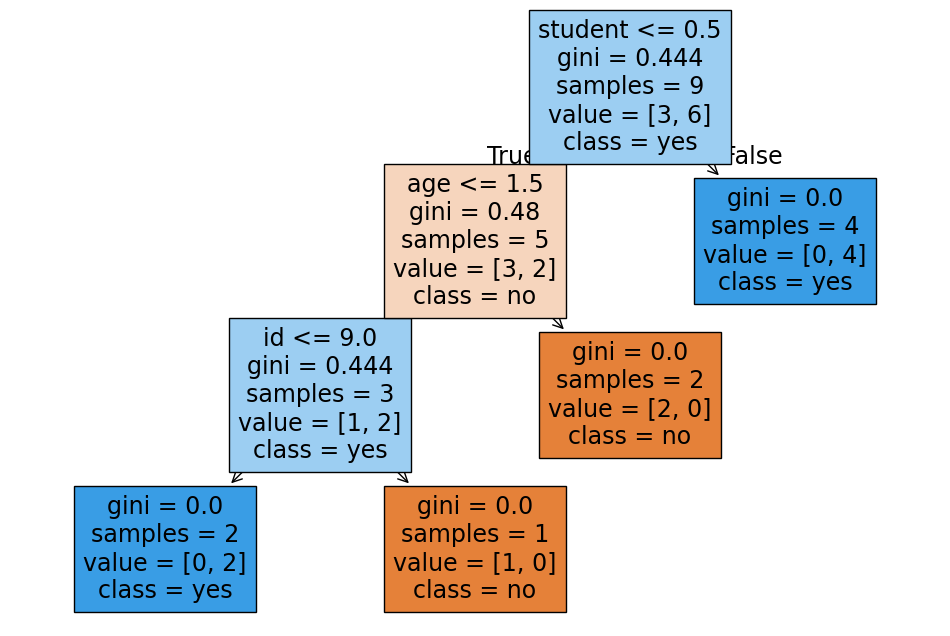

In [18]:
# Step 6: Decision Tree Model
# Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limit depth for interpretability
dt_model.fit(X_train, y_train)

# Generate tree rules as logical expressions
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

# Plot the Decision Tree
plt.figure(figsize=(12,8))
plot_tree(dt_model, feature_names=X.columns, class_names=label_encoders['buy_computer'].classes_, filled=True)
plt.show()

In [19]:
# Step 7: Random Forest Model
# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Step 8: Naive Bayes Model
# Train the Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [21]:
# Step 9: Make Predictions and Evaluate Each Model
# Decision Tree
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

# Random Forest
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Naive Bayes
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")

Decision Tree Accuracy: 60.00%
Random Forest Accuracy: 60.00%
Naive Bayes Accuracy: 60.00%
